In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer

/home/vicentecipre/miniconda3/envs/prueba/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vicentecipre/miniconda3/envs/prueba/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vicentecipre/miniconda3/envs/prueba/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vicentecipre/minico

In [2]:
data = load_breast_cancer()
data["data"][0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print("las dimensiones del conjunto son: ",data.data.shape)
print("los posibles balores son: ",data.target_names)
dic = {"0":sum(data.target==0),"1":sum(data.target==1)}
print("las clases estan repartidas de la siguiente manera: ",dic)
print(data.feature_names)

las dimensiones del conjunto son:  (569, 30)
los posibles balores son:  ['malignant' 'benign']
las clases estan repartidas de la siguiente manera:  {'0': 212, '1': 357}
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=1/3)
N,D = X_train.shape

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation = "sigmoid")
    ])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

r = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100)

print("Train score:" , model.evaluate(X_train,y_train))
print("Test score:" , model.evaluate(X_test,y_test))

Train on 379 samples, validate on 190 samples
Epoch 1/100
379/379 [==============================] - 0s 583us/sample - loss: 0.8237 - accuracy: 0.4512 - val_loss: 0.7730 - val_accuracy: 0.5105
Epoch 2/100
379/379 [==============================] - 0s 83us/sample - loss: 0.7368 - accuracy: 0.5541 - val_loss: 0.6881 - val_accuracy: 0.6474
Epoch 3/100
379/379 [==============================] - 0s 74us/sample - loss: 0.6604 - accuracy: 0.6385 - val_loss: 0.6164 - val_accuracy: 0.7053
Epoch 4/100
379/379 [==============================] - 0s 78us/sample - loss: 0.5954 - accuracy: 0.7124 - val_loss: 0.5560 - val_accuracy: 0.7579
Epoch 5/100
379/379 [==============================] - 0s 68us/sample - loss: 0.5421 - accuracy: 0.7810 - val_loss: 0.5053 - val_accuracy: 0.8158
Epoch 6/100
379/379 [==============================] - 0s 122us/sample - loss: 0.4962 - accuracy: 0.8206 - val_loss: 0.4636 - val_accuracy: 0.8474
Epoch 7/100
379/379 [==============================] - 0s 101us/sample - los

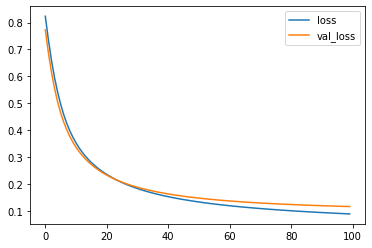

In [27]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

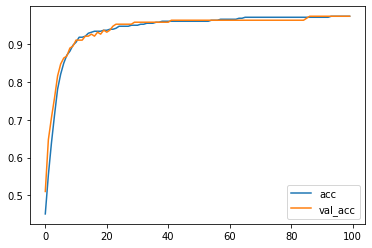

In [28]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Evaluación del modelo

In [32]:
P = model.predict(X_test)
print("predicciones del modelo con el conjunto X_test:\n",P.flatten()) 

predicciones del modelo con el conjunto X_test:
 [9.7707236e-01 9.8999166e-01 9.8596442e-01 8.0490375e-01 9.9789864e-01
 9.8299122e-01 9.6204221e-01 2.6458263e-02 1.6129017e-04 9.8812479e-01
 8.0718780e-01 8.8775587e-01 3.2606721e-04 9.3885142e-01 5.1171488e-01
 9.7214293e-01 9.7792113e-01 8.8511348e-01 7.3720813e-03 9.3946540e-01
 9.6350908e-05 9.9726200e-01 8.2133877e-01 9.9351043e-01 3.5293955e-01
 9.8560619e-01 9.2087686e-03 9.2612422e-01 9.7826374e-01 9.9200225e-01
 9.8176253e-01 9.6171367e-01 5.1967663e-01 9.9969065e-01 9.6046358e-01
 9.9638009e-01 9.1238457e-01 7.6106727e-01 1.6964376e-03 3.3127779e-01
 6.5207481e-04 9.6662426e-01 1.5621752e-02 1.6142368e-02 4.8579136e-01
 3.2782555e-07 9.9938422e-01 9.8111272e-01 9.2319727e-01 8.6697996e-01
 9.8254240e-01 9.9921280e-01 2.1783590e-02 9.8974395e-01 1.8447340e-03
 2.4694306e-01 6.1187744e-03 8.8190961e-01 1.7670989e-03 9.9954927e-01
 9.4945693e-01 2.9802322e-08 9.9468589e-01 9.9777210e-01 7.6586246e-01
 3.2081252e-01 9.7223270e-01

In [36]:
import numpy as np
P = np.round(P).flatten()
print("valor asociado a cada prediccion: \n",P)
print("accuracy calculado a mano:", np.mean(P == y_test))
evaluación= model.evaluate(X_test, y_test)
print("accuracy evaluado por el modelo:", evaluación[1] )
print("loss evaluado por el modelo:", evaluación[0] )

valor asociado a cada prediccion: 
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.]
accuracy calculado a mano: 0.9736842105263158
190/190 [==============================] - 0s 43us/sample - loss: 0.1155 - accuracy: 0.9737
accuracy evaluado por el modelo: 0.9736842
loss evaluado por el modelo: 0.11545735589767757


## Guardando un modelo

In [ ]:
model.save('linearclassifier.h5')

In [1]:
# Check that the model file exists
!ls -lh 

total 164K
-rw-r--r-- 1 vicentecipre vicentecipre  60K ene 21 11:49 'Linear Classification.ipynb'
-rw-rw-r-- 1 vicentecipre vicentecipre    0 ene 19 13:32 'Linear Classification.py'
-rw-r--r-- 1 vicentecipre vicentecipre  95K ene 20 16:32 'Linear regression.ipynb'
-rw-r--r-- 1 vicentecipre vicentecipre 2,3K ene 20 13:22  moore.csv
-rw-r--r-- 1 vicentecipre vicentecipre 2,3K ene 20 13:31  moore.csv.1


In [ ]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

In [ ]:
# Esto para google colab 
# Download the file - requires Chrome (at this point)
# from google.colab import files
# files.download('linearclassifier.h5')